## Trying open source baselines

In [22]:
from semantic_search.utils import load_metadata
from semantic_search.data_retrieval.utils import extract_abstract_from_md

df, ref_df = load_metadata(
    '/Users/luis/Desktop/ETH/Courses/SS25-DSL/data/metadata3',
    filter_good_papers=True,
    filter_good_references=True
)

df.head()
df['abstract'] = df['fpath'].apply(extract_abstract_from_md)
df = df[df.abstract.apply(len) > 0]

In [24]:
df.abstract[0]

'We introduce the Fixed Point Diffusion Model (FPDM), a novel approach to image generation that integrates the concept of fixed point solving into the framework of diffusionbased generative modeling. Our approach embeds an implicit fixed point solving layer into the denoising network of a diffusion model, transforming the diffusion process into a sequence of closely-related fixed point problems. Combined with a new stochastic training method, this approach significantly reduces model size, reduces memory usage, and accelerates training. Moreover, it enables the development of two new techniques to improve sampling efficiency: reallocating computation across timesteps and reusing fixed point solutions between timesteps. We conduct extensive experiments with state-of-the-art models on ImageNet, FFHQ, CelebA-HQ, and LSUN-Church, demonstrating substantial improvements in performance and efficiency. Compared to the state-of-the-art DiT model [38], FPDM contains 87% fewer parameters, consume

In [34]:
import os, requests

API_KEY = os.getenv("SEMANTIC_SCHOLAR_API_KEY")
SEMSCHOL_URL = "https://api.semanticscholar.org/graph/v1/paper/search"
OPENALEX_URL = "https://api.openalex.org/works"
CORE_URL = "https://api.core.ac.uk/v3/search/works"

def semschol_search(query: str, limit: int = 5):
    resp = requests.get(
        SEMSCHOL_URL,
        params={
            "query": query,
            "fields": "title,abstract,year,authors,url",
            "limit": limit
        },
        headers={"x-api-key": API_KEY} if API_KEY else {}
    )
    resp.raise_for_status()
    return resp.json().get("data", [])


OPENALEX_EMAIL = os.getenv("OPENALEX_EMAIL")  # e.g. "yourname@example.com"

def openalex_search(query: str, per_page: int = 5):
    params = {
        "search": query,
        "per-page": per_page
    }
    if OPENALEX_EMAIL:
        params["mailto"] = OPENALEX_EMAIL
    resp = requests.get(OPENALEX_URL, params=params)
    resp.raise_for_status()
    return resp.json().get("results", [])


API_KEY  = os.getenv("CORE_API_KEY")  # set this to your CORE API key

def core_search(query: str, page_size: int = 5):
    headers = {"Authorization": f"Bearer {API_KEY}"} if API_KEY else {}
    params  = {"q": query, "pageSize": page_size}
    r = requests.get(CORE_URL, params=params, headers=headers)
    r.raise_for_status()
    return r.json().get("data", [])

query = [df.abstract[0][:100], "Deeper neural networks are more difficult to train. We present a residual learning framework to ease the training of networks that are substantially deeper than those used previously."][1]
# semschol_search(query)
semschol_search(query), openalex_search(query), core_search(query)

HTTPError: 500 Server Error: Internal Server Error for url: https://api.core.ac.uk/v3/search/works/?q=Deeper+neural+networks+are+more+difficult+to+train.+We+present+a+residual+learning+framework+to+ease+the+training+of+networks+that+are+substantially+deeper+than+those+used+previously.&pageSize=5

## Core and referenced paper stats

In [43]:
df, ref_df = load_metadata(
    '/Users/luis/Desktop/ETH/Courses/SS25-DSL/data/metadata3',
    filter_good_papers=True,
    filter_good_references=True
)

In [38]:
df.head()

,fpath,fname,title,oaid,oa_doi,oa_sim_score_1st,oa_sim_score_2nd,oa_ref_cnt,oa_refs_oaid,ssid,ss_doi,ss_sim_score,ss_ref_cnt,ss_refs_ssid,ss_refs_doi,refs_oaids_from_dois,refs_dois_from_oaids,ref_jaccard
0,/cluster/home/lcarretero/workspace/dsl/dsl-res...,Bai_Fixed_Point_Diffusion_Models_CVPR_2024_pap...,Fixed Point Diffusion Models,W4402774861,10.1109/cvpr52733.2024.00901,1.0,1.000000,0.0,[],fdb679246a2125dad1628081e45efb7a1c80f2c7,10.1109/CVPR52733.2024.00901,1.0,56.0,"[9b91b3031ea159e4964d18b2ce703168660ecf46, 0e8...","[10.48550/arXiv.2401.11605, 10.48550/arXiv.240...","[w4385245566, w2108598243, w3094502228, w43129...",[],NaN
1,/cluster/home/lcarretero/workspace/dsl/dsl-res...,Li_BEVNeXt_Reviving_Dense_BEV_Frameworks_for_3...,BEVNeXt: Reviving Dense BEV Frameworks for 3D ...,W4402727763,10.1109/cvpr52733.2024.01901,1.0,1.000000,73.0,"[W1861492603, W2083047701, W2108598243, W21245...",a23f6180d6908499a8238c06f4fb57bf431a2b43,10.1109/CVPR52733.2024.01901,1.0,70.0,"[02882d2dc6e3938a327a66663e55339190784534, 93c...","[10.48550/arXiv.2310.15670, 10.48550/arXiv.230...","[w2194775991, w4385245566, w2108598243, w18614...","[10.1109/cvpr.2016.90, 10.48550/arxiv.1706.037...",0.762619
2,/cluster/home/lcarretero/workspace/dsl/dsl-res...,Savchenko_Leveraging_Pre-trained_Multi-task_De...,Leveraging Pre-trained Multi-task Deep Models ...,W4402916217,10.1109/cvprw63382.2024.00473,1.0,0.000000,0.0,[],9c50996ba35eb605cb9bcd5835103b441cf38e07,10.1109/CVPRW63382.2024.00473,1.0,57.0,"[9a70cc28d1475665c1d3f0aa76ae9c962d9109d5, 63d...","[10.1109/CVPRW63382.2024.00483, 10.48550/arXiv...","[w4286910290, w4288327876, w2713788831, w29819...",[],NaN
3,/cluster/home/lcarretero/workspace/dsl/dsl-res...,Geada_Insights_from_the_Use_of_Previously_Unse...,Insights from the Use of Previously Unseen Neu...,W4402727561,10.1109/cvpr52733.2024.02127,1.0,0.987342,23.0,"[W1686810756, W2097117768, W2108598243, W21515...",a494cfa653ae449019ffe8c8908bfec8042218d2,10.1109/CVPR52733.2024.02127,1.0,38.0,"[48af7a849d063f9e7771eba585e01b0f49dcb26b, 5a9...","[10.1016/s0262-4079(24)01566-5, 10.48550/arXiv...","[w2194775991, w2108598243, w2963446712, w30945...","[10.1109/cvpr.2016.90, nan, 10.1109/cvpr.2009....",0.448611
4,/cluster/home/lcarretero/workspace/dsl/dsl-res...,Khairi_Efficient_Local_Correlation_Volume_for_...,Efficient local correlation volume for unsuper...,W4402904316,10.1109/cvprw63382.2024.00049,1.0,0.000000,28.0,"[W1513100184, W1578285471, W1867429401, W19931...",1bede9c7617eda6d635114c0ebf9c621f96e6485,10.1109/CVPRW63382.2024.00049,1.0,29.0,"[c4c04e3aa4f60f0dd3c29b463890cf5610497d23, 50c...","[10.1016/j.jag.2023.103543, 10.1109/ICCV51070....","[w2133665775, w1867429401, w1513100184, w20596...","[10.1109/tip.2003.819861, 10.1016/0004-3702(81...",0.656863


In [41]:
df.ss_ref_cnt.sum(), df.oa_ref_cnt.sum()

(60944.0, 25938.0)

(25061, 10)


/scratch/tmp.30933079.lcarretero/ipykernel_225165/3825937339.py:23: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


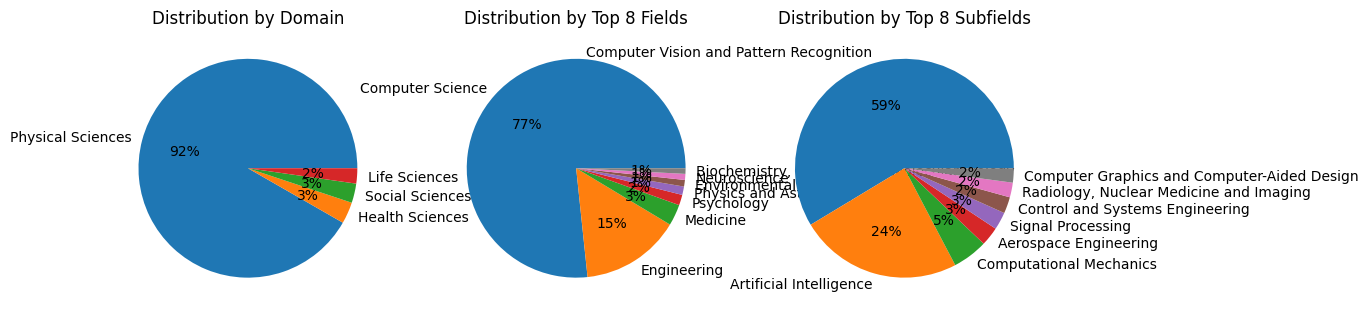

,oaid,doi,ref_via,title,abstract,type,topic,domain,field,subfield
0,W2194775991,10.1109/cvpr.2016.90,openalex_id,Deep Residual Learning for Image Recognition,Deeper neural networks are more difficult to t...,article,Advanced Neural Network Applications,Physical Sciences,Computer Science,Computer Vision and Pattern Recognition
1,W1686810756,NaN,openalex_id,Very Deep Convolutional Networks for Large-Sca...,In this work we investigate the effect of the ...,article,Advanced Vision and Imaging,Physical Sciences,Computer Science,Computer Vision and Pattern Recognition
2,W4385245566,10.48550/arxiv.1706.03762,openalex_id,Attention Is All You Need,The dominant sequence transduction models are ...,preprint,Natural Language Processing Techniques,Physical Sciences,Computer Science,Artificial Intelligence
3,W2108598243,10.1109/cvpr.2009.5206848,openalex_id,ImageNet: A large-scale hierarchical image dat...,The explosion of image data on the Internet ha...,article,Advanced Image and Video Retrieval Techniques,Physical Sciences,Computer Science,Computer Vision and Pattern Recognition
4,W2133665775,10.1109/tip.2003.819861,openalex_id,Image Quality Assessment: From Error Visibilit...,Objective methods for assessing perceptual ima...,article,Image and Video Quality Assessment,Physical Sciences,Computer Science,Computer Vision and Pattern Recognition


In [52]:
print(ref_df.shape)
# Create pie charts for field, domain, and subfield distributions
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Domain distribution
domain_counts = ref_df['domain'].value_counts()
axes[0].pie(domain_counts, labels=domain_counts.index, autopct='%1.0f%%')
axes[0].set_title('Distribution by Domain')

# Field distribution
field_counts = ref_df['field'].value_counts().head(8)
axes[1].pie(field_counts, labels=field_counts.index, autopct='%1.0f%%')
axes[1].set_title('Distribution by Top 8 Fields')

# Subfield distribution (showing top 10 for readability)
subfield_counts = ref_df['subfield'].value_counts().head(8)
axes[2].pie(subfield_counts, labels=subfield_counts.index, autopct='%1.0f%%')
axes[2].set_title('Distribution by Top 8 Subfields')

plt.tight_layout()
plt.show()

# Display the dataframe head as well
ref_df.head()

In [ ]:
scp -r lcarretero@euler.ethz.ch:/Users/luis/Desktop/ETH/Courses/SS25-DSL/data/metadata3 /Users/luis/Desktop/tmp

In [54]:
import numpy as np
fpath = r'/Users/luis/Desktop/ETH/Courses/SS25-DSL/db/allenai_specter2/embeddings.npy'
arr = np.load(fpath)
arr.shape


(25526, 384)

## Visualize latent space

In [56]:
from semantic_search.store import milvus_store
reload(milvus_store)

<module 'semantic_search.store.milvus_store' from '/Users/luis/Desktop/ETH/Courses/SS25-DSL/src/semantic_search/store/milvus_store.py'>

In [70]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from semantic_search.store.milvus_store import MilvusDocumentStore


ds = MilvusDocumentStore()
ds.load_store(db_superdir='/Users/luis/Desktop/ETH/Courses/SS25-DSL/db', store_name='mini_gte')

max_n = 10000
embeddings = ds.embeddings[:max_n, :]
docs = ds.document_store[:max_n]

# Apply SVD to reduce dimensions to 50 (or another appropriate value)
svd = TruncatedSVD(n_components=32, random_state=42)
embeddings_svd = svd.fit_transform(embeddings)

# Then apply t-SNE on the SVD-reduced embeddings
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_svd)

Using device: mps
Loaded store from /Users/luis/Desktop/ETH/Courses/SS25-DSL/db/mini_gte


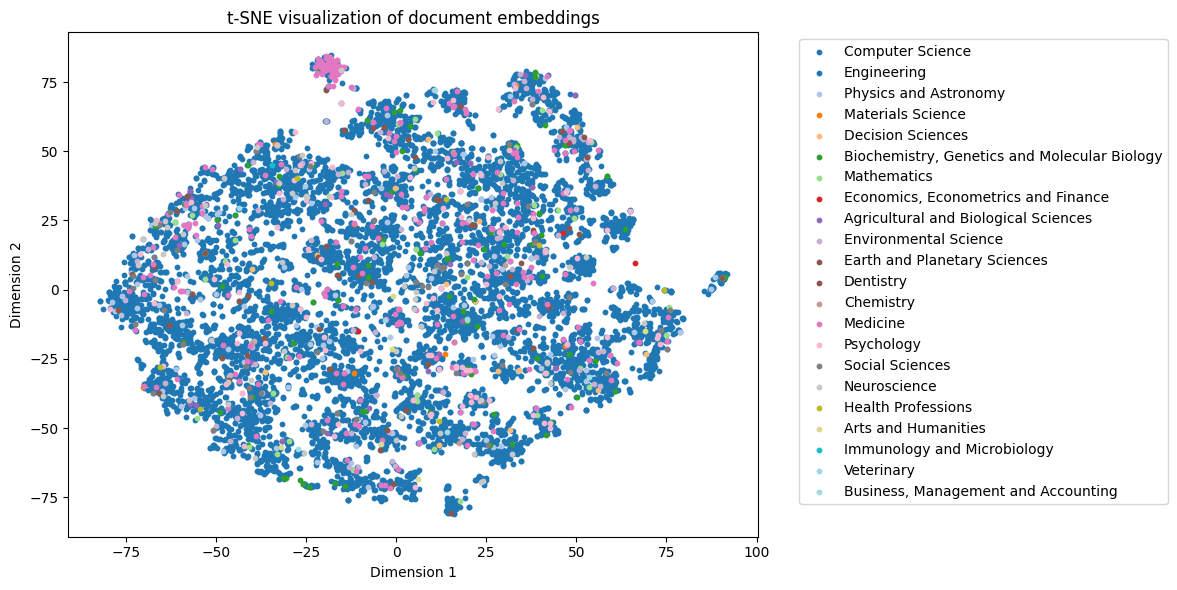

In [71]:
# Plot the embeddings
cat = docs['field']  # topic, subfield, domain

# Get unique categories and create a colormap
unique_categories = cat.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_categories)))
color_dict = dict(zip(unique_categories, colors))

plt.figure(figsize=(12, 6))
for category, color in color_dict.items():
    mask = cat == category
    plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], 
                color=color, alpha=1, s=10, label=category)
    
plt.title('t-SNE visualization of document embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Related work - abstract prediction benchmark dev

In [1]:
import json

with open('/Users/luis/Desktop/ETH/Courses/SS25-DSL/data/luis.json', 'r') as f:
    metadata = json.load(f)

In [40]:
import pandas as pd
import re

def remove_intext_citations(text: str) -> str:
    # Pattern matches brackets containing numbers separated by commas and optional spaces
    pattern = r'\[\s*\d+(?:\s*,\s*\d+)*\s*\]'
    return re.sub(pattern, '', text)

benchmark_data = pd.DataFrame(metadata)
benchmark_data['sentence'] = benchmark_data['sentence'].apply(remove_intext_citations)
benchmark_data.rename(columns={'sentence': 'text', 'ref_oaids': 'references'}, inplace=True)

<Axes: >

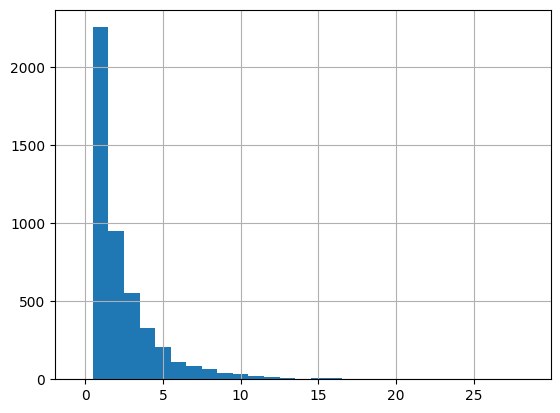

In [59]:
benchmark_data.references.apply(len).hist(bins=range(0, 30, 1), align='left')

#### Paper sections

In [36]:
from pathlib import Path
import re
import pandas as pd
import numpy as np

data = []
for fpath in Path('/Users/luis/Desktop/ETH/Courses/SS25-DSL/data/Conversions/opencvf-data/txt').glob('*.txt'):
    # Read the file and extract headings
    with open(fpath, 'r') as f:
        content = f.read()
    
    # Look for headings that start with ## 
    # Match headings that start with ## followed by a number but not subheadings with decimal points
    headings = re.findall(r'## (\d+\.[^.\d][^\n]+)', content)  # Match main sections like "1. Introduction" but not "1.1. Background"

    data.append({
        'file': fpath.name,
        'headings': [title[3:] for title in headings]
    })
df2 = pd.DataFrame(data)

In [46]:
pd.Series(np.concatenate(df2.headings.values)).value_counts().head(10)

Introduction     1130
Conclusion        826
Related Work      686
Experiments       669
Method            340
Methodology       185
Related Works     157
Related work      118
Conclusions       109
Results            84
Name: count, dtype: int64

In [53]:
def contains_section(headings: list, section_name: str) -> bool:
    return section_name in headings

(df2.headings.apply(lambda x: 'Experiments' in x).value_counts()/len(df2)*100).round(1)

headings
True     58.6
False    41.4
Name: count, dtype: float64

In [1]:
import pandas as pd
import json
import os
import re

metadata_dirpath = '/Users/luis/Desktop/ETH/Courses/SS25-DSL/data/metadata3'
first_n_queries = -1

def remove_intext_citations(text: str) -> str:
# Pattern matches brackets containing numbers separated by commas and optional spaces
    pattern = r'\[\s*\d+(?:\s*,\s*\d+)*\s*\]'
    return re.sub(pattern, '', text)

with open(os.path.join(metadata_dirpath, 'related_work_data.json'), 'r') as f:
    related_work_data = json.load(f)

df = pd.DataFrame(related_work_data)
df['sentence'] = df['sentence'].apply(remove_intext_citations)
df.rename(columns={'sentence': 'text', 'ref_oaids': 'references'}, inplace=True)
df = df.iloc[:first_n_queries]

In [2]:
df.paper_oaid.nunique()

458

In [7]:
import sys
sys.path.append('/Users/luis/Desktop/ETH/Courses/SS25-DSL/src')

In [12]:
from semantic_search.store import utils
from importlib import reload
reload(utils)

<module 'semantic_search.store.utils' from '/Users/luis/Desktop/ETH/Courses/SS25-DSL/src/semantic_search/store/utils.py'>

In [17]:
from semantic_search.store.utils import update_store_doc_metadata


update_store_doc_metadata(store_name='specter2_base')

Added 4 new columns: ['authors', 'pub_date', 'publisher', 'cit_str']


In [4]:
# Group by paper_oaid, concatenate texts and take union of references
grouped_df = df.groupby('paper_oaid').agg({
    'text': ' '.join,
    'references': lambda x: list(set(sum(x, [])))  # Flatten and get unique references
}).reset_index()

grouped_df.head()

,paper_oaid,text,references
0,W2051222366,"Later, several representation learning techniq...","[W4394625750, W3174301209, W4321276804, W42249..."
1,W4307079403,BEiT proposes to recover discrete visual toke...,"[W4280617157, W4312804044, W4313156423, W29923..."
2,W4309805051,Uncertainty-based methods aim to select sampl...,"[W3205483686, W2774918944, W2962766617, W29642..."
3,W4309870517,RTNet proposes a reciprocal transformation ne...,"[W3111891682, W2981342784, W3170511209, W43193..."
4,W4310886663,The VQ-based generative model is first introdu...,"[W4301914798, W3096831136, W4281771798, W43824..."


## Advanced retrieval analysis and citation_count correlator
- Aim: Get better understanding of what factors influence retrieval success
- Explicitly add additional signals into retrieval document rating (e.g. papers with more citations should be retrieved more often)

Using best model: mini-gte

In [1]:
import sys
sys.path.append('/Users/luis/Desktop/ETH/Courses/SS25-DSL/src')

In [2]:
from importlib import reload
from semantic_search import utils
reload(utils)
from semantic_search.utils import load_data
df, ref_df = load_data(dirpath='/Users/luis/Desktop/ETH/Courses/SS25-DSL/data/metadata3', filter_good_papers=True, filter_good_references=True)

/Users/luis/Desktop/ETH/Courses/SS25-DSL/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [167]:
from tqdm import tqdm
import pandas as pd

from semantic_search.store.milvus_store import MilvusDocumentStore
from semantic_search.store.faiss_store import FAISSDocumentStore
from semantic_search.utils import predict_refs_from_abstract, load_data
from semantic_search.benchmarking.utils import calc_metric_at_topk
from semantic_search.data_retrieval.utils import extract_abstract_from_md


store_dirpath = '/Users/luis/Desktop/ETH/Courses/SS25-DSL/db'
store_name = 'mini_gte'
metadata_dirpath = '/Users/luis/Desktop/ETH/Courses/SS25-DSL/data/metadata3'
store_type = 'milvus'
search_kwargs = dict(
    retrieval_method='hybrid',
    add_hot_papers=False,
    use_citation_scoring=True,
    cit_score_weight=0.05
)
first_n_papers = 400
pref_top_k = 42  # Preferred number of top results to analyze

# Load paper and reference metadata
print('Loading data...')
df, ref_df = load_data(metadata_dirpath, filter_good_papers=True, filter_good_references=True)
df['abstract'] = df['fpath'].apply(extract_abstract_from_md)
df = df[df.abstract.apply(len) > 0]
df = df.iloc[:first_n_papers]

available_refs = set(ref_df['oaid'].str.lower().values)
df['GT_refs'] = df.refs_oaids_from_dois.apply(lambda refs: [ref for ref in refs if ref in available_refs])
df['available_ref_ratio'] = df.GT_refs.apply(len) / df.refs_oaids_from_dois.apply(len)

# Load document store
print('Loading document store...')
if store_type == 'faiss':
    ds = FAISSDocumentStore(db_superdir=store_dirpath, store_name=store_name)
elif store_type == 'milvus':
    ds = MilvusDocumentStore(db_superdir=store_dirpath, store_name=store_name)
assert ds.load_store() # Make sure store has been initialized
if store_type == 'milvus':
    assert ds.check_index_available()

try:
    # Predict references
    print('Predicting references...')
    max_top_k = 200
    ref_cnts = list(range(1, max_top_k + 1))
    
    results = []
    
    
    # Lists to store true positives, false positives, and false negatives
    true_positives = []
    false_positives = []
    false_negatives = []
    
    for i, row in tqdm(df.iterrows(), total=len(df), desc='Predicting references'):
        pred = predict_refs_from_abstract(ds, row['abstract'], max_top_k=max_top_k, search_kwargs=search_kwargs)
        metrics = calc_metric_at_topk(row['GT_refs'], pred, ref_cnts)
        results.append(metrics)
        
        # Analyze prediction quality
        top_k_pred = set(el.lower() for el in pred[:pref_top_k])
        gt_refs = set(el.lower() for el in row['GT_refs'])
        
        # Find true positives, false positives, and false negatives
        # Find true positives (intersection of predicted and ground truth)
        tp_set = top_k_pred & gt_refs
        true_positives.extend(tp_set)
        
        # Find false positives (predicted but not in ground truth)
        fp_set = top_k_pred - gt_refs
        false_positives.extend(fp_set)
        
        # Find false negatives (in ground truth but not predicted)
        fn_set = gt_refs - top_k_pred
        false_negatives.extend(fn_set)
    
    results_df = pd.DataFrame(results)
finally:
    # Close store
    if store_type == 'milvus':
        ds._disconnect_client()

Loading data...
Loading document store...
Using device: mps
Loaded store from /Users/luis/Desktop/ETH/Courses/SS25-DSL/db/mini_gte
Predicting references...


Predicting references: 100%|██████████| 400/400 [00:40<00:00,  9.99it/s]


In [168]:
# Count occurrences of each reference in the lists
tp_counts = pd.Series(true_positives).value_counts().reset_index()
tp_counts.columns = ['oaid', 'count']
tp_counts['prediction_type'] = 'true_positive'

fp_counts = pd.Series(false_positives).value_counts().reset_index()
fp_counts.columns = ['oaid', 'count']
fp_counts['prediction_type'] = 'false_positive'

fn_counts = pd.Series(false_negatives).value_counts().reset_index()
fn_counts.columns = ['oaid', 'count']
fn_counts['prediction_type'] = 'false_negative'

# Combine all counts
all_counts = pd.concat([tp_counts, fp_counts, fn_counts], ignore_index=True)

# Merge with reference data
all_counts['oaid_lower'] = all_counts['oaid'].str.lower()
ref_df['oaid_lower'] = ref_df['oaid'].str.lower()

# Join the counts with reference data
merged_df = pd.merge(all_counts, ref_df, on='oaid_lower', how='inner')

# Create the final analysis dataframe by repeating rows based on count
analysis_df = merged_df.loc[merged_df.index.repeat(merged_df['count'])].reset_index(drop=True)

# Drop temporary columns
analysis_df = analysis_df.drop(['oaid_lower', 'count', 'oaid_x'], axis=1, errors='ignore')
if 'oaid_y' in analysis_df.columns:
    analysis_df = analysis_df.rename(columns={'oaid_y': 'oaid'})

# Print summary statistics
print(f"True Positives: {len(analysis_df[analysis_df['prediction_type'] == 'true_positive'])} references (with duplicates)")
print(f"False Positives: {len(analysis_df[analysis_df['prediction_type'] == 'false_positive'])} references (with duplicates)")
print(f"False Negatives: {len(analysis_df[analysis_df['prediction_type'] == 'false_negative'])} references (with duplicates)")

True Positives: 4159 references (with duplicates)
False Positives: 12641 references (with duplicates)
False Negatives: 14160 references (with duplicates)


/var/folders/kn/k8zt16ss511gp4m6y14ttn840000gn/T/ipykernel_2398/1323642604.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['bin'] = pd.cut(df_valid[column], bins=bins, labels=labels)


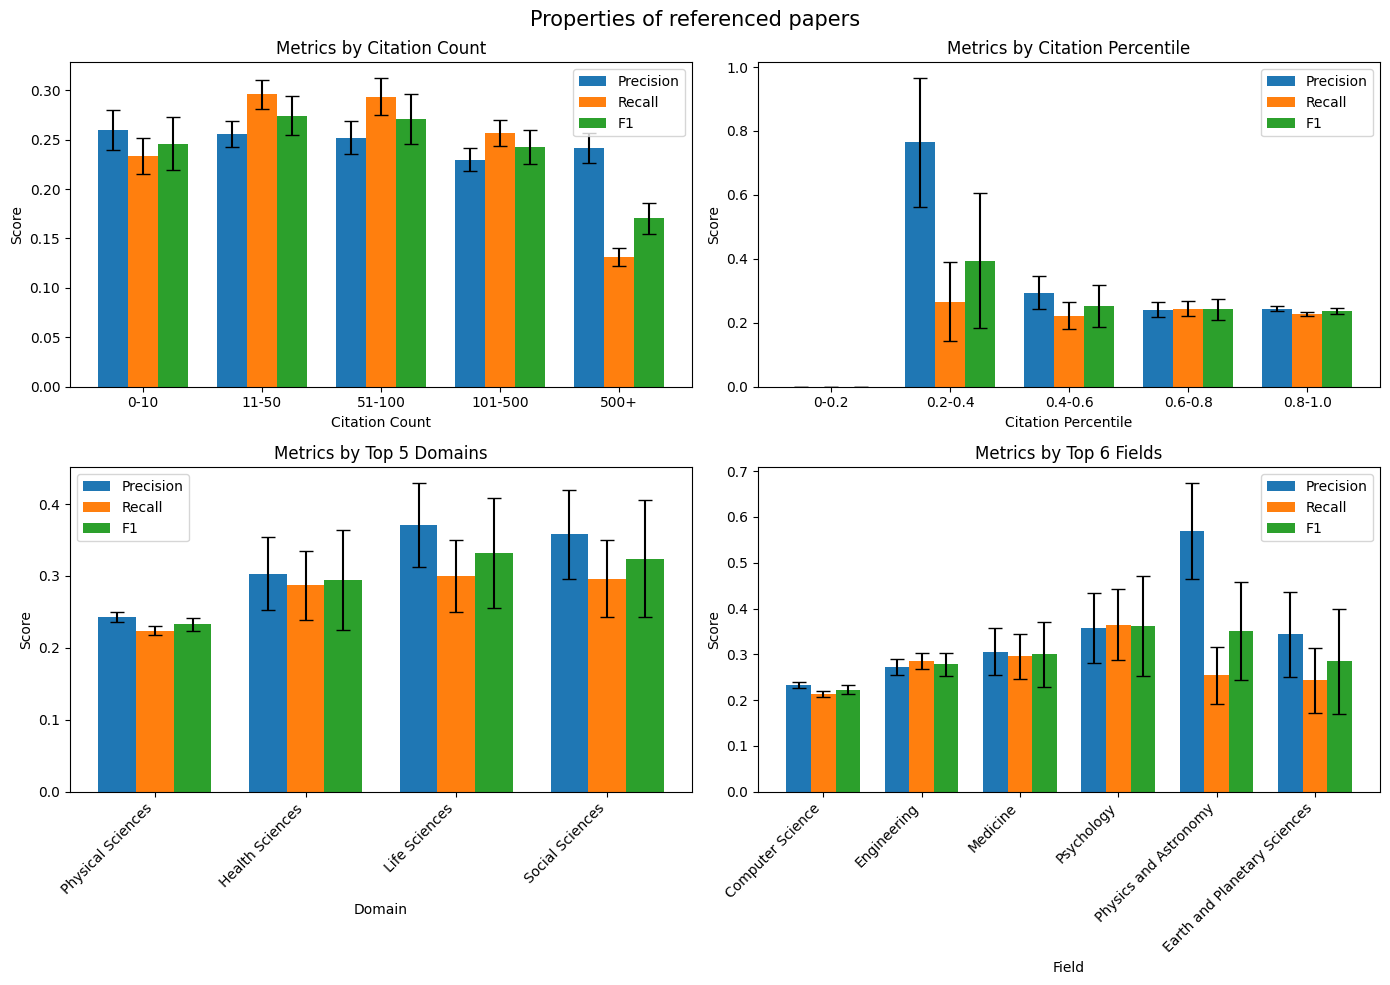

In [169]:
# Columns = ['oaid', 'doi', 'ref_via', 'title', 'abstract', 'type', 'topic', 'domain', 'field', 'subfield', 'cited_by_count', 'citation_normalized_percentile', 'is_in_top_1_percent', 'is_in_top_10_percent', 'prediction_type']

# Calculate F1 scores for different bins and categories

from semantic_search.benchmarking.utils import score_predictions

def calculate_binned_metrics(df, column, bins=None, labels=None, categorical=False):
    """
    Calculate metrics (precision, recall, F1, jaccard) for different bins of a column.
    
    Args:
        df: DataFrame with prediction_type column
        column: Column to bin by
        bins: Bin edges for numerical data or None for categorical
        labels: Labels for bins or None
        categorical: Whether the column is categorical
    
    Returns:
        DataFrame with metrics for each bin
    """
    results = []
    
    # Prepare data - either group by categories or bin numerical values
    if categorical:
        categories = df[column].dropna().unique()
        groups = [(category, df[df[column] == category]) for category in categories]
    else:
        df_valid = df.dropna(subset=[column])
        if bins is None:
            bins = 5  # Default to 5 equal-sized bins
        df_valid['bin'] = pd.cut(df_valid[column], bins=bins, labels=labels)
        groups = [(bin_label, df_valid[df_valid['bin'] == bin_label]) for bin_label in df_valid['bin'].unique()]
    
    # Calculate metrics for each group
    for bin_label, subset in groups:
        # Count references by prediction type
        tp_count = len(subset[subset['prediction_type'] == 'true_positive'])
        fp_count = len(subset[subset['prediction_type'] == 'false_positive'])
        fn_count = len(subset[subset['prediction_type'] == 'false_negative'])
        
        # Calculate metrics
        precision = tp_count / (tp_count + fp_count) if (tp_count + fp_count) > 0 else 0
        recall = tp_count / (tp_count + fn_count) if (tp_count + fn_count) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        jaccard = tp_count / (tp_count + fp_count + fn_count) if (tp_count + fp_count + fn_count) > 0 else 0
        
        # Calculate error estimates (using Wilson score interval for binomial proportion)
        # For simplicity, we'll use a normal approximation with 95% confidence
        z = 1.96  # 95% confidence
        total_predictions = tp_count + fp_count
        total_relevant = tp_count + fn_count
        
        # Precision error
        if total_predictions > 0:
            prec_err = z * np.sqrt((precision * (1 - precision)) / total_predictions)
        else:
            prec_err = 0
            
        # Recall error
        if total_relevant > 0:
            rec_err = z * np.sqrt((recall * (1 - recall)) / total_relevant)
        else:
            rec_err = 0
            
        # F1 error (approximation using error propagation)
        if precision + recall > 0:
            f1_err = f1 * np.sqrt((prec_err/precision)**2 + (rec_err/recall)**2) if precision > 0 and recall > 0 else 0
        else:
            f1_err = 0
            
        # Jaccard error (approximation)
        total_union = tp_count + fp_count + fn_count
        if total_union > 0:
            jaccard_err = z * np.sqrt((jaccard * (1 - jaccard)) / total_union)
        else:
            jaccard_err = 0
        
        results.append({
            'bin': bin_label,
            'count': len(subset),
            'prec': precision,
            'prec_err': prec_err,
            'rec': recall,
            'rec_err': rec_err,
            'f1': f1,
            'f1_err': f1_err,
            'jaccard': jaccard,
            'jaccard_err': jaccard_err
        })
    
    return pd.DataFrame(results)

# 1. Bin by cited_by_count
cited_bins = [0, 10, 50, 100, 500, float('inf')]
cited_labels = ['0-10', '11-50', '51-100', '101-500', '500+']
cited_metrics = calculate_binned_metrics(analysis_df, 'cited_by_count', bins=cited_bins, labels=cited_labels)

# 2. Bin by citation_normalized_percentile
percentile_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
percentile_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
percentile_metrics = calculate_binned_metrics(analysis_df, 'citation_normalized_percentile', 
                                             bins=percentile_bins, labels=percentile_labels)

# 3. Group by domain (categorical)
domain_metrics = calculate_binned_metrics(analysis_df, 'domain', categorical=True)

# 4. Group by field (categorical)
field_metrics = calculate_binned_metrics(analysis_df, 'field', categorical=True)

# Remove NaN values from all metrics dataframes
cited_metrics = cited_metrics.dropna()
percentile_metrics = percentile_metrics.dropna()
domain_metrics = domain_metrics.dropna()
field_metrics = field_metrics.dropna()

# Visualize the results
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Properties of referenced papers', fontsize=15)

# Plot metrics by citation count - ensure order is preserved
width = 0.25
# Sort by bin values to ensure proper ordering
# Create a custom order for the citation bins
bin_order = {'0-10': 0, '11-50': 1, '51-100': 2, '101-500': 3, '500+': 4}
cited_metrics['bin_order'] = cited_metrics['bin'].map(bin_order)
cited_metrics = cited_metrics.sort_values(by='bin_order')
x = cited_metrics['bin'].astype(str)
x_pos = np.arange(len(x))

# Plot with error bars
axes[0, 0].bar(x_pos - width, cited_metrics['prec'], width, label='Precision', yerr=cited_metrics['prec_err'], capsize=5)
axes[0, 0].bar(x_pos, cited_metrics['rec'], width, label='Recall', yerr=cited_metrics['rec_err'], capsize=5)
axes[0, 0].bar(x_pos + width, cited_metrics['f1'], width, label='F1', yerr=cited_metrics['f1_err'], capsize=5)
axes[0, 0].set_title('Metrics by Citation Count')
axes[0, 0].set_xlabel('Citation Count')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(x)
axes[0, 0].legend()

# Plot metrics by percentile - ensure order is preserved
# Create a custom order for the percentile bins
percentile_order = {'0-0.2': 0, '0.2-0.4': 1, '0.4-0.6': 2, '0.6-0.8': 3, '0.8-1.0': 4}
percentile_metrics['bin_order'] = percentile_metrics['bin'].map(percentile_order)
percentile_metrics = percentile_metrics.sort_values(by='bin_order')
x = percentile_metrics['bin'].astype(str)
x_pos = np.arange(len(x))

axes[0, 1].bar(x_pos - width, percentile_metrics['prec'], width, label='Precision', yerr=percentile_metrics['prec_err'], capsize=5)
axes[0, 1].bar(x_pos, percentile_metrics['rec'], width, label='Recall', yerr=percentile_metrics['rec_err'], capsize=5)
axes[0, 1].bar(x_pos + width, percentile_metrics['f1'], width, label='F1', yerr=percentile_metrics['f1_err'], capsize=5)
axes[0, 1].set_title('Metrics by Citation Percentile')
axes[0, 1].set_xlabel('Citation Percentile')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(x)
axes[0, 1].legend()

# Plot top 5 domains by count
top_domains = domain_metrics.sort_values('count', ascending=False).head(5)
x = top_domains['bin'].astype(str)
x_pos = np.arange(len(x))

axes[1, 0].bar(x_pos - width, top_domains['prec'], width, label='Precision', yerr=top_domains['prec_err'], capsize=5)
axes[1, 0].bar(x_pos, top_domains['rec'], width, label='Recall', yerr=top_domains['rec_err'], capsize=5)
axes[1, 0].bar(x_pos + width, top_domains['f1'], width, label='F1', yerr=top_domains['f1_err'], capsize=5)
axes[1, 0].set_title('Metrics by Top 5 Domains')
axes[1, 0].set_xlabel('Domain')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(x)
axes[1, 0].legend()
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot top 6 fields by count
top_fields = field_metrics.sort_values('count', ascending=False).head(6)
x = top_fields['bin'].astype(str)
x_pos = np.arange(len(x))

axes[1, 1].bar(x_pos - width, top_fields['prec'], width, label='Precision', yerr=top_fields['prec_err'], capsize=5)
axes[1, 1].bar(x_pos, top_fields['rec'], width, label='Recall', yerr=top_fields['rec_err'], capsize=5)
axes[1, 1].bar(x_pos + width, top_fields['f1'], width, label='F1', yerr=top_fields['f1_err'], capsize=5)
axes[1, 1].set_title('Metrics by Top 6 Fields')
axes[1, 1].set_xlabel('Field')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(x)
axes[1, 1].legend()
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


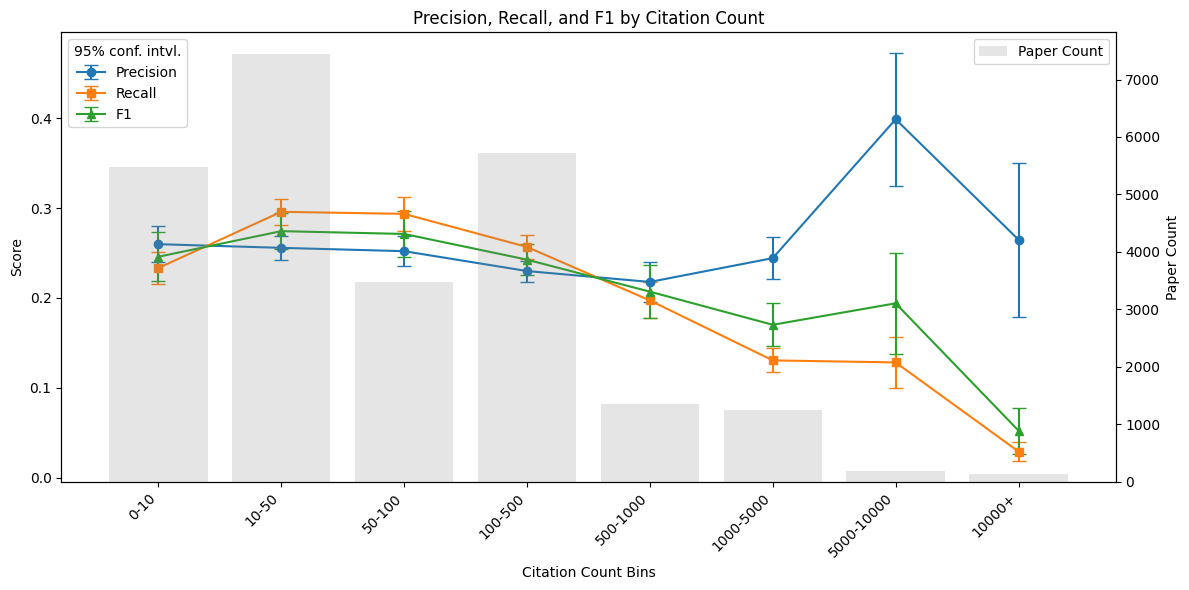

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# cited_bins = np.logspace(-1, 8)
cited_bins = [0, 10, 50, 100, 500, 1000, 5000, int(1e4), float('inf')]

# Dynamically generate labels based on bin edges
cited_labels = []
for i in range(len(cited_bins) - 1):
    if i == len(cited_bins) - 2:  # Last bin
        cited_labels.append(f"{cited_bins[i]}+")
    else:
        cited_labels.append(f"{cited_bins[i]}-{cited_bins[i+1]}")
cited_metrics = calculate_binned_metrics(analysis_df, 'cited_by_count', bins=cited_bins, labels=cited_labels).dropna()
paper_count = ref_df['cited_by_count'].value_counts(bins=cited_bins, sort=False)
# Create a line plot of precision, recall, and F1 over citation bins with paper count on secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))
# Create a custom order for the bins based on citation count
bin_order = [cited_labels.index(bin_name) for bin_name in cited_metrics['bin']]
cited_metrics['bin_order'] = bin_order
cited_metrics = cited_metrics.sort_values(by='bin_order')

# Filter out rows with NaN values or zero counts
cited_metrics = cited_metrics[cited_metrics['count'] > 0]

# Primary y-axis for metrics
ax1.errorbar(cited_metrics['bin'], cited_metrics['prec'], yerr=cited_metrics['prec_err'], 
             marker='o', label='Precision', capsize=5)
ax1.errorbar(cited_metrics['bin'], cited_metrics['rec'], yerr=cited_metrics['rec_err'], 
             marker='s', label='Recall', capsize=5)
ax1.errorbar(cited_metrics['bin'], cited_metrics['f1'], yerr=cited_metrics['f1_err'], 
             marker='^', label='F1', capsize=5)
ax1.set_xlabel('Citation Count Bins')
ax1.set_ylabel('Score')
ax1.set_title('Precision, Recall, and F1 by Citation Count')
# Fix the tick_params call by removing horizontalalignment
ax1.tick_params(axis='x', rotation=45)
# Set the alignment separately using plt.setp
plt.setp(ax1.get_xticklabels(), ha='right')
ax1.legend(loc='upper left', title='95% conf. intvl.')
ax1.grid(True, linestyle='--', alpha=0.7)

# Secondary y-axis for paper count
ax2 = ax1.twinx()
# Get paper counts for each bin
paper_counts = []
for bin_name in cited_metrics['bin']:
    bin_index = cited_labels.index(bin_name)
    bin_start = cited_bins[bin_index]
    bin_end = cited_bins[bin_index + 1]
    
    # For the last bin (with '+' notation)
    if '+' in bin_name:
        count = ref_df[ref_df['cited_by_count'] >= bin_start].shape[0]
    else:
        count = ref_df[(ref_df['cited_by_count'] >= bin_start) & 
                       (ref_df['cited_by_count'] < bin_end)].shape[0]
    
    paper_counts.append(count)

ax2.bar(cited_metrics['bin'], paper_counts, alpha=0.2, color='gray', label='Paper Count')
ax2.set_ylabel('Paper Count')
ax2.legend(loc='upper right')
ax2.grid(False)
ax1.grid(False)
plt.tight_layout()
plt.show()

In [157]:
from importlib import reload
from semantic_search.store import milvus_store
reload(milvus_store)
from semantic_search.store.milvus_store import MilvusDocumentStore

ds = MilvusDocumentStore(db_superdir=store_dirpath, store_name=store_name)
assert ds.load_store()

Using device: mps
Loaded store from /Users/luis/Desktop/ETH/Courses/SS25-DSL/db/mini_gte


In [147]:
ds.search('Deep learning', top_k=10, return_doc_metadata=False, add_hot_papers=True, use_citation_scoring=True, cit_score_weight=1)

[{'rank': 1,
  'id': 'W2194775991',
  'score': 1.0,
  'emb_score': 0.7142332792282104,
  'cit_score': 1.0},
 {'rank': 2,
  'id': 'W2110065044',
  'score': 0.9458107110674859,
  'emb_score': 0.0,
  'cit_score': 0.9458107110674859},
 {'rank': 3,
  'id': 'W1522301498',
  'score': 0.9338293044132283,
  'emb_score': 0.0,
  'cit_score': 0.9338293044132283},
 {'rank': 4,
  'id': 'W2064675550',
  'score': 0.9322491946969566,
  'emb_score': 0.0,
  'cit_score': 0.9322491946969566},
 {'rank': 5,
  'id': 'W1995875735',
  'score': 0.9241819206641152,
  'emb_score': 0.0,
  'cit_score': 0.9241819206641152},
 {'rank': 6,
  'id': 'W1686810756',
  'score': 0.9211817224529212,
  'emb_score': 0.0,
  'cit_score': 0.9211817224529212},
 {'rank': 7,
  'id': 'W2163605009',
  'score': 0.9168172552096797,
  'emb_score': 0.0,
  'cit_score': 0.9168172552096797},
 {'rank': 8,
  'id': 'W2101234009',
  'score': 0.9093551173030325,
  'emb_score': 0.0,
  'cit_score': 0.9093551173030325},
 {'rank': 9,
  'id': 'W43852455